In [1]:
import numpy as np
from sklearn import tree

# Exercise 1.3:

We have been given the following data:

| Weather  | Temperature | Humidity | Wind   | Decision |
|----------|-------------|----------|--------|----------|
| Sunny    | Hot         | High     | Weak   | No       |
| Sunny    | Hot         | High     | Strong | No       |
| Overcast | Hot         | High     | Weak   | Yes      |
| Rain     | Mild        | High     | Weak   | Yes      |
| Rain     | Cool        | Normal   | Weak   | Yes      |
| Rain     | Cool        | Normal   | Strong | No       |
| Overcast | Cool        | Normal   | Strong | Yes      |
| Sunny    | Mild        | High     | Weak   | No       |
| Sunny    | Cool        | Normal   | Weak   | Yes      |
| Rain     | Mild        | Normal   | Weak   | Yes      |
| Sunny    | Mild        | Normal   | Strong | Yes      |
| Overcast | Mild        | High     | Strong | Yes      |
| Overcast | Hot         | Normal   | Weak   | Yes      |
| Rain     | Mild        | High     | Strong | No       |

However, when using scikit-learn we need to work with numerical values, so we need to translate our attributes into numbers:

* **Weather**: Sunny=0, Overcast=1, Rain=2
* **Temperature**: Hot=0, Mild=1, Cool=2
* **Humidity**: High=0, Normal=1
* **Wind**: Weak=0, Strong=1

And we encode the decision as No=0, Yes=1. With this, we can build our data in Python as follows:

In [2]:
training_data = [[0, 0, 0, 0, 0], # Sunny,     Hot,  High,   Weak,   No
                 [0, 0, 0, 1, 0], # Sunny,     Hot,  High,   Strong, No
                 [1, 0, 0, 0, 1], # Overcast,  Hot,  High,   Weak,   Yes
                 [2, 1, 0, 0, 1], # Rain,      Mild, High,   Weak,   Yes
                 [2, 2, 1, 0, 1], # Rain,      Cool, Normal, Weak,   Yes
                 [2, 2, 1, 1, 0], # Rain,      Cool, Normal, Strong, No
                 [1, 2, 1, 1, 1], # Overcast,  Cool, Normal, Strong, Yes
                 [0, 1, 0, 0, 0], # Sunny,     Mild, High,   Weak,   No
                 [0, 2, 1, 0, 1], # Sunny,     Cool, Normal, Weak,   Yes
                 [2, 1, 1, 0, 1], # Rain,      Mild, Normal, Weak,   Yes
                 [0, 1, 1, 1, 1], # Sunny,     Mild, Normal, Strong, Yes
                 [1, 1, 0, 1, 1], # Overcast,  Mild, High,   Strong, Yes
                 [1, 0, 1, 0, 1], # Overcast,  Hot,  Normal, Weak,   Yes
                 [2, 1, 0, 1, 0], # Rain,      Mild, High,   Strong, No
                ]
training_data = np.array(training_data)
print(training_data.shape)

(14, 5)


In [3]:
features, targets = training_data[:, 0:-1], training_data[:, -1]

In [4]:
classifier = tree.DecisionTreeClassifier()

In [5]:
trained_classifier = classifier.fit(features, targets)

Today is sunny and cool, with a high humidity high and there is strong wind. Should you open the course?

That translates numerically to:

In [6]:
today = [0, 2, 0, 1], # Sunny, Cool, High, Strong

In [7]:
trained_classifier.predict(today)

array([0])

Which means that we should not be opening the course.

# Exercise 2:
There are about 12,000 user sessions represented in our spreadsheet: represented as one row for each user session. The first six columns measure the different types of pages users have visited in the session: the `Administrative`, `Informational`, and `ProductRelated` columns measure how many of those types of pages the user visited, and their corresponding `_Duration` columns measure how much time the user spent on any of those pages. The `BounceRates`, `ExitRates`, and `PageValues` columns measure information from Google Analytics about the page the user visited. `SpecialDay` is a value that measures how closer the date of the user's session is to a special day (like Valentine's Day or Mother's Day). `Month` is an abbreviation of the month the user visited. `OperatingSystems`, `Browser`, `Region`, and `TrafficType` are all integers describing information about the user themself. `VisitorType` will take on the value `Returning_Visitor` for returning visitors and some other string value for non-returning visitors. Weekend is TRUE or FALSE depending on whether or not the user is visiting on a weekend.

The last column is `Revenue`. This is the column that indicates whether the user ultimately made a purchase or not: TRUE if they did, FALSE if they didn’t. This is the column that we'd like to learn to predict (the "label"), based on the values for all of the other columns (the "features").

We first load the data, and check that the rows and columns are as expected:

In [8]:
import pandas as pd

In [9]:
x = pd.read_csv('shopping.csv')

In [10]:
x.shape

(12330, 18)

In [11]:
x.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='str')

Both Month and VisitorType have weird data types and in this case we choose the safe (and easy) approach of simply removing them from our dataset:

In [12]:
x.drop(['Month', 'VisitorType'], axis=1, inplace=True)

In [13]:
x.shape

(12330, 16)

In [14]:
x.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='str')

## Exercise 2.1
Divide the data into a train and a test set, and train a scikit-learn decision tree on the training set. Evaluate its accuracy both in the training and in the test set. Do you see underfitting or overfitting?

In [15]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.4
x_train, x_test = train_test_split(x, test_size=TEST_SIZE, random_state=7)

In [16]:
columns = x_train.columns
features_train, features_test = x_train[columns[:-1]], x_test[columns[:-1]]
labels_train, labels_test = x_train[columns[-1]], x_test[columns[-1]]

In [17]:
features_train.shape, labels_train.shape

((7398, 15), (7398,))

In [18]:
features_test.shape, labels_test.shape

((4932, 15), (4932,))

In [19]:
print(labels_test)

3120      True
9285     False
5521     False
7202      True
5377     False
         ...  
9270     False
4342     False
2250     False
10961    False
3611     False
Name: Revenue, Length: 4932, dtype: bool


In [20]:
classifier = tree.DecisionTreeClassifier()

In [21]:
trained_classifier = classifier.fit(features_train, labels_train)

In [22]:
trained_classifier.score(features_train, labels_train)

1.0

In [23]:
trained_classifier.score(features_test, labels_test)

0.8546228710462287

## Exercise 2.2
In order to improve the performance of your classifier, let us limit the maximum depth of the tree to 5 and repeat the training. What is the impact of reducing the depth on the performance of your classifier in the training, and in the test set?

In [24]:
classifier = tree.DecisionTreeClassifier(max_depth=3)

In [25]:
trained_classifier = classifier.fit(features_train, labels_train)

In [26]:
trained_classifier.score(features_train, labels_train)

0.8941605839416058

In [27]:
trained_classifier.score(features_test, labels_test)

0.8858475263584753

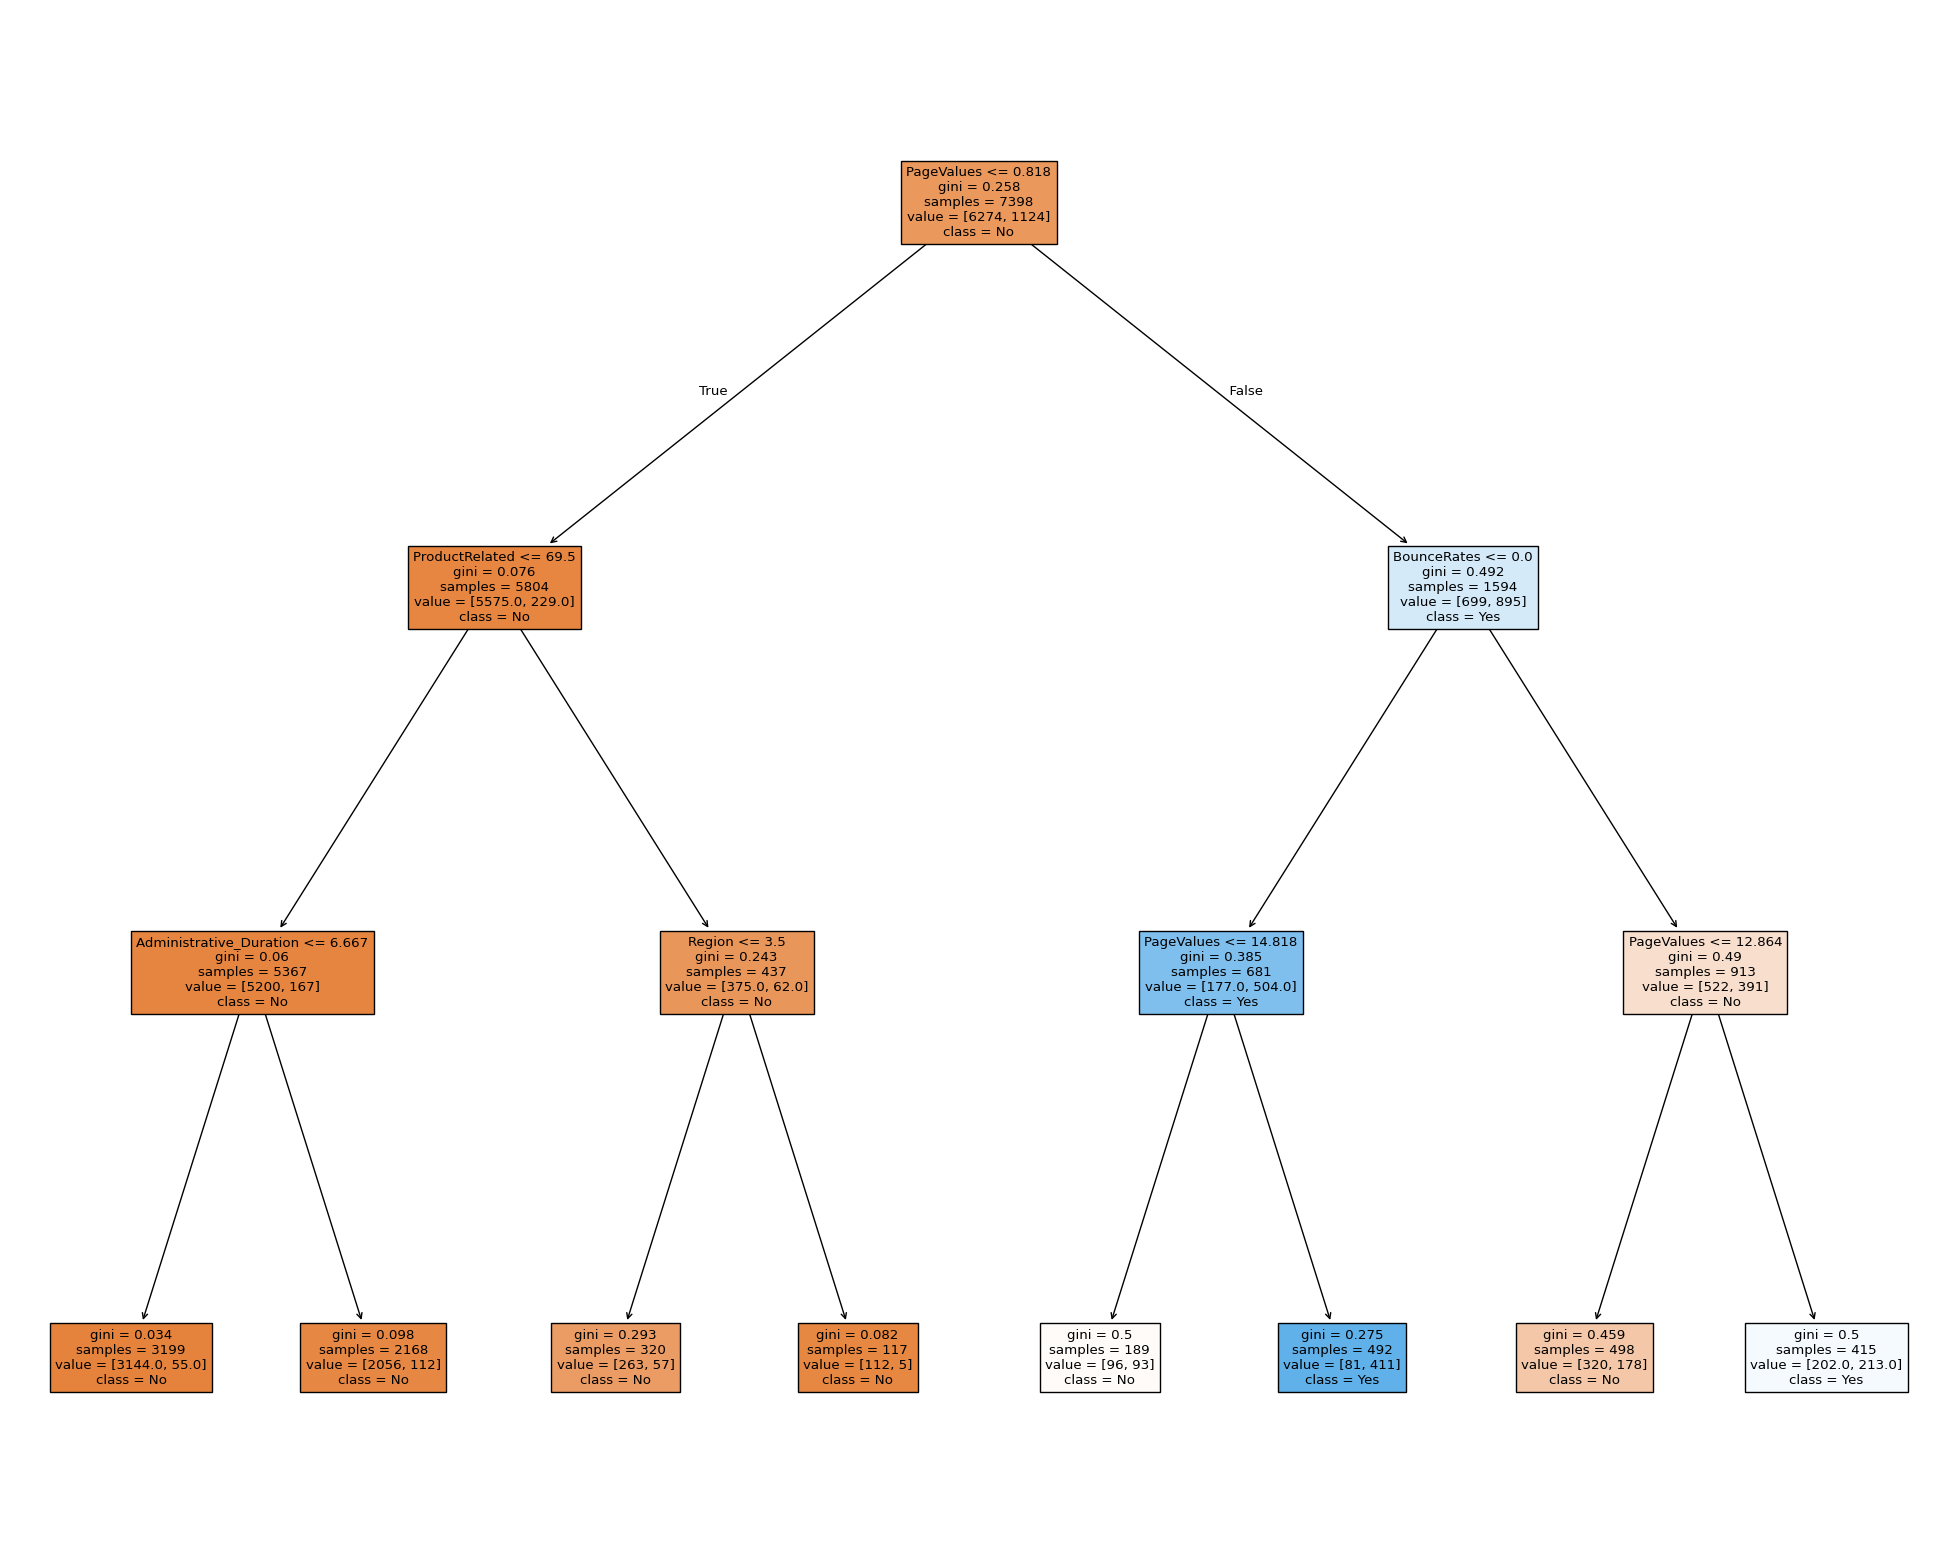

In [28]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(trained_classifier,
                   feature_names=features_train.columns.tolist(),
                   class_names=['No','Yes'],
                   filled=True)